In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [0]:
def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])


def intersection_over_union(boxes):
    assert(len(boxes) == 8)
    boxA = boxes[:4].values
    boxB = boxes[4:].values
    
    boxAArea = area(boxA)
    boxBArea = area(boxB)
    
    if (boxAArea == 0 or boxBArea == 0):
        return 0
        
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [0]:
from google.colab import drive
drive.mount('drive')

In [0]:
votes = pd.read_csv("drive/My Drive/sna9/train3_data.csv")
votes.head()

сделаю дф из максов

In [34]:
data = pd.read_csv("drive/My Drive/sna9/dataiou.csv")
data.head()

,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,iou,Xc,Yc,Xc_true,Yc_true
0,5,151,914,511,1331,198,827,649,1340,0.525002,331.0,1122.5,423.5,1083.5
1,10,72,559,427,858,26,605,433,847,0.736209,249.5,708.5,229.5,726.0
2,13,46,600,621,981,233,698,622,920,0.394233,333.5,790.5,427.5,809.0
3,30,65,353,324,491,61,368,329,530,0.640055,194.5,422.0,195.0,449.0
4,32,9,279,388,884,30,536,328,813,0.360035,198.5,581.5,179.0,674.5


In [0]:
sortXc = data.sort_values(by=['Xc_true'])

# ИТАК.
### Возьму просто кминс по центрам - в предположении, что точность обводки зависит от местоположения на основном изображении

In [0]:
from sklearn.cluster import KMeans

In [0]:
X = data[['Xmin_true','Ymin_true','Xmax_true','Ymax_true']] # - анализ ТРУ объектов
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)  # 4 - в предположении, что объекты м.б. по углам 

In [128]:
pd.Series(kmeans.labels_).value_counts()

3    259
0    244
2    242
1    196
dtype: int64

In [0]:
X = data[['Xc_true','Yc_true']] # - анализ ТРУ объектов
 kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [36]:
pd.Series(kmeans.labels_).value_counts()

1    298
0    234
2    205
3    204
dtype: int64

имеем практически равное распределение, что радует. Теперь дело за пророками))

In [0]:
data['clusters'] = kmeans.labels_
data0 = data[data.clusters == 0]
data1 = data[data.clusters == 1]
data2 = data[data.clusters == 2]
data3 = data[data.clusters == 3]

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression, Perceptron, Ridge, BayesianRidge, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

0.9364559329721885
0.9364559329721885


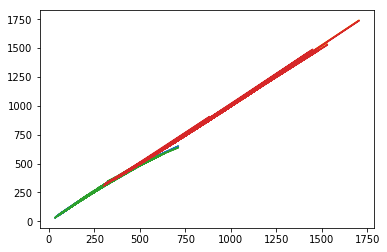

In [80]:
X = sortXc[['Xc', 'Yc']]
y = sortXc[['Xc_true', 'Yc_true']]
for count, degree in enumerate([2, 3,]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    print(reg.score(X, y))
    y_plot = model.predict(X)
    plt.plot(X, y_plot, label="degree %d" % degree)
    

In [0]:
X = data[['Xc', 'Yc']]
y = data[['Xc_true', 'Yc_true']]
reg = SGDRegressor.fit(X, y)
reg.score(X, y) # 0.9364559329721885

In [0]:
plt.plot(data.Xc_true, data.Yc_true)

In [0]:
def regr(data):
    X = data[['Xmin','Ymin','Xmax','Ymax']]
    y = data[['Xmin_true','Ymin_true','Xmax_true','Ymax_true']]
    reg = LinearRegression().fit(X, y)
    print(reg.score(X, y))
    return reg

In [135]:
reg0 = regr(data0) # 0.9133804936443672
reg1 = regr(data1) # 0.7756021992820684
reg2 = regr(data2) # 0.8282140908967711
reg3 = regr(data3) # 0.9308975410651963

0.8728605816632665
0.6621019402966318
0.5890956398219378
0.9076552984295632


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

так. Точность меньше, чем у целого... А бейзлайны какие, кста?

In [136]:
print(data["iou"].mean()) # 0.5572509602623342 ???
print(data0["iou"].mean())
print(data1["iou"].mean())
print(data2["iou"].mean())
print(data3["iou"].mean())

0.5572509602623342
0.5364004262270263
0.5901605038016602
0.602033590145674
0.5101461855099728


ничо не понимаю.... почему точность вдруг 0.5572509602623342 вместо 0.5822325332074827 ???

## Ok... VALID IT !!!

In [137]:
# NEW Centres
pred0 = reg0.predict(data0[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred0 = pd.DataFrame({'itemId': data0.itemId, 'Xmin': pred0[:, 0], 'Ymin': pred0[:, 1], 'Xmax': pred0[:, 2], 'Ymax': pred0[:, 3]}, index=data0.index)
df_pred0.head()

,itemId,Xmin,Ymin,Xmax,Ymax
1,10,87.067103,571.308807,378.030794,813.784481
3,30,68.546332,346.144626,298.627812,506.036725
4,32,67.177750,370.457012,363.692534,715.228869
6,64,45.613075,424.422584,224.297223,563.100328
8,90,79.234701,293.056611,416.599027,574.049723


In [0]:
pred1 = reg1.predict(data1[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred1 = pd.DataFrame({'itemId': data1.itemId, 'Xmin': pred1[:, 0], 'Ymin': pred1[:, 1], 'Xmax': pred1[:, 2], 'Ymax': pred1[:, 3]}, index=data1.index)

pred2 = reg2.predict(data2[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred2 = pd.DataFrame({'itemId': data2.itemId, 'Xmin': pred2[:, 0], 'Ymin': pred2[:, 1], 'Xmax': pred2[:, 2], 'Ymax': pred2[:, 3]}, index=data2.index)

pred3 = reg3.predict(data3[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred3 = pd.DataFrame({'itemId': data3.itemId, 'Xmin': pred3[:, 0], 'Ymin': pred3[:, 1], 'Xmax': pred3[:, 2], 'Ymax': pred3[:, 3]}, index=data3.index)

In [0]:
answers = pd.concat([df_pred0, df_pred1, df_pred2, df_pred3]).sort_index()
answers = pd.concat([answers, data[['Xmin_true','Ymin_true','Xmax_true','Ymax_true']]], axis=1)
answers
answers['iou'] = answers[['Xmin','Ymin','Xmax','Ymax','Xmin_true','Ymin_true','Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [142]:
answers['iou'].mean()

0.5707543494882795

# TRY IT...

In [0]:
votest = pd.read_csv("drive/My Drive/sna9/test1_data.csv")

In [0]:
Xminmin = votest.groupby("itemId")['Xmin'].min().reset_index().set_index('itemId')
Yminmin = votest.groupby("itemId")['Ymin'].min().reset_index().set_index('itemId')
Xmaxmax = votest.groupby("itemId")['Xmax'].max().reset_index().set_index('itemId')
Ymaxmax = votest.groupby("itemId")['Ymax'].max().reset_index().set_index('itemId')

In [126]:
maxbox = pd.concat([Xminmin,Yminmin,Xmaxmax,Ymaxmax], axis=1)
maxbox.head()

,Xmin,Ymin,Xmax,Ymax
itemId,,,,
18,126,634,764,1132
19,27,559,119,729
33,21,380,414,652
62,35,824,639,1262
114,41,570,216,780


In [0]:
X = maxbox[['Xmin','Ymin','Xmax','Ymax']] 
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [144]:
pd.Series(kmeans.labels_).value_counts()

3    230
2    146
0    146
1    108
dtype: int64

In [0]:
maxbox['clusters'] = kmeans.labels_
maxbox0 = maxbox[maxbox.clusters == 0]
maxbox1 = maxbox[maxbox.clusters == 1]
maxbox2 = maxbox[maxbox.clusters == 2]
maxbox3 = maxbox[maxbox.clusters == 3]

In [0]:
pred0 = reg0.predict(maxbox0[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred0 = pd.DataFrame({ 'Xmin': pred0[:, 0], 'Ymin': pred0[:, 1], 'Xmax': pred0[:, 2], 'Ymax': pred0[:, 3]}, index=maxbox0.index)

pred1 = reg1.predict(maxbox1[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred1 = pd.DataFrame({ 'Xmin': pred1[:, 0], 'Ymin': pred1[:, 1], 'Xmax': pred1[:, 2], 'Ymax': pred1[:, 3]}, index=maxbox1.index)

pred2 = reg2.predict(maxbox2[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred2 = pd.DataFrame({ 'Xmin': pred2[:, 0], 'Ymin': pred2[:, 1], 'Xmax': pred2[:, 2], 'Ymax': pred2[:, 3]}, index=maxbox2.index)

pred3 = reg3.predict(maxbox3[['Xmin','Ymin','Xmax','Ymax']]) 
df_pred3 = pd.DataFrame({ 'Xmin': pred3[:, 0], 'Ymin': pred3[:, 1], 'Xmax': pred3[:, 2], 'Ymax': pred3[:, 3]}, index=maxbox3.index)

In [0]:
answers = pd.concat([df_pred0, df_pred1, df_pred2, df_pred3]).sort_index()
answers.to_csv("drive/My Drive/sna9/clusters4.csv", header=None)